## Three Stock Monte

This exercise tests your ability to retrieve stock price data using the Alpaca API and simulate multiple portfolio compositions using Monte Carlo Simulation.

Instructions:

1. Review the libraries and dependencies that have been imported into the `three_stock_monte.ipynb` notebook. Note that the MCSimulation tools have been imported into the notebook via the MCForecastTools library. The `Unsolved` folder includes the MCForecastTools library as a Python file .

2. Create an environment file (`.env`) in the `Unsolved` folder. Include variables for `ALPACA_API_KEY` and `ALPACA_SECRET_KEY` in this file for accessing the Alpaca API.

3. Load the environment variables into `three_stock_monte.ipynb`, and then import the Alpaca API and secret keys.

4. Set up the Alpaca API `REST` object. Make sure that this object includes your Alpaca API key, your Alpaca secret key, and a reference to the version that you’re using.

5. Use the Alpaca SDK to make an Alpaca API call that gets three years of daily historical price data for the following three stocks:

    - `NKE` (Nike)

    - `T` (AT&T)

    - `XOM` (Exxon Mobil)

6. Create an instance of MCSimulation with the following parameters that simulates the next five years of portfolio returns:

    - `weights`: Set this parameter to `[.33,.33,.33]` to evenly invest across all three stocks.

    - `num_simulation`: Set this parameter to `1000` to ensure the reliability of your simulation. If your computer struggles to run 1000 simulations, change the parameter value to 500.

    - `num_trading_days`: Set this parameter to `252*5` to simulate five years of trading days.

7. Run the Monte Carlo simulation. Using MCSimulation functions, visualize the simulation results by using both an overlay line plot and a histogram. Generate the summary statistics for the simulation, too.

8. Using a 95% confidence interval and your initial investment of $15,000, determine the lower and upper bounds of the expected cumulative-return value of your portfolio after five years of growth.

9. Create a second instance of MCSimulation with the same parameters, but set the `weights` parameter to `[.20,.60,.20]` to represent a portfolio with a majority of AT&T stock.

10. Run the Monte Carlo simulation with the new weights. Then use MCSimulation functions to do the following:

    - Visualize the simulation results by using both an overlay line plot and a histogram.

    - Generate the summary statistics for this new simulation.

    - Using a 95% confidence interval and your initial investment of $15,000, determine the lower and upper bounds of the expected cumulative-return value of your portfolio after five years of growth.

11. Create a third instance of MCSimulation with the same parameters, but set the `weights` variable to `[.60,.20,.20]` to represent a portfolio with a majority of Nike stock.

12. Run the Monte Carlo simulation with the new weights. Then use MCSimulation functions to do the following:

    - Visualize the simulation results by using both an overlay line plot and a histogram.

    - Generate the summary statistics for this new simulation.

    - Using a 95% confidence interval and your initial investment of $15,000, determine the lower and upper bounds of the expected cumulative-return value of your portfolio after five years of growth.

13. Create a fourth instance of MCSimulation with the same parameters, but set the `weights` variable to `[.20,.20,.60]` to represent a portfolio with a majority of Exxon stock.

14. Run the Monte Carlo simulation with the new weights. Using a 95% confidence interval and your initial investment of $15,000, determine the lower and upper bounds of the expected cumulative-return value of your portfolio after five years of growth.

15. Review all four simulated portfolios, and determine which set of investments gives you the best chance of a profit. In your notebook, write which portfolio you choose, and why.

References:

[Alpaca API Docs](https://alpaca.markets/docs/api-documentation/)


## Step 1: Review the libraries and dependencies that have been imported into the `three_stock_monte.ipynb` notebook. Note that the MCSimulation tools have been imported into the notebook via the MCForecastTools library. The `Unsolved` folder includes the MCForecastTools library as a Python file .

In [1]:
# Import libraries and dependencies
import os
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

## Step 2: Create an environment file (`.env`) in the `Unsolved` folder. Include variables for `ALPACA_API_KEY` and `ALPACA_SECRET_KEY` in this file for accessing the Alpaca API

## Step 3: Load the environment variables into `three_stock_monte.ipynb`, and then import the Alpaca API and secret keys.

* Load the environment variable by calling the `load_dotenv()` function.
* Set the value of the variables `alpaca_api_key` and `alpaca_secret_key` equal to their respective environment variables. 
* Confirm the variables are available by checking the `type` of each. 

In [2]:
# Load the environment variables by calling the load_dotenv function
load_dotenv()


True

In [3]:
# Set Alpaca API key and secret by calling the os.getenv function and referencing the environment variable names
# Set each environment variable to a notebook variable of the same name
# Set Alpaca API key and secret key
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
type(alpaca_secret_key)
type(alpaca_api_key)



str

## Step 4: Set up the Alpaca API `REST` object. Make sure that this object includes your Alpaca API key, your Alpaca secret key, and a reference to the version that you’re using.

In [4]:
# Create your Alpaca API REST object by calling Alpaca's tradeapi.REST function
# Set the parameters to your alpaca_api_key, alpaca_secret_key and api_version="v2" 
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)


## Step 5:  Use the Alpaca SDK to make an Alpaca API call that gets three years of daily historical price data for the following three stocks: NKE, T, and XOM.

* Create the list for the required `tickers`.
* Set the values for `start_date` and `end_date` using the `pd.Timestamp` function. The dates should be 2017-05-01 through 2020-05-01.
* Set the `timeframe` value to 1 day.
* Create the `portfolio_prices_df` DataFrame by setting it equal to the `alpaca.get_bars` function. 


In [5]:
# Create the list for the required tickers
tickers = ["NKE", "T", "XOM"]


In [6]:
# Set the values for start_date and end_date using the pd.Timestamp function
# Inside the function set the date parameter to the prior business day 
# The start and end data should be 2017-05-01 to 2020-05-01
# Set the parameter tz to "America/New_York", 
# Set this all to the ISO format by calling the isoformat function 

start_date = pd.Timestamp("2017-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()


In [7]:
# Set timeframe to one day (1Day)
timeframe = "1Day"


In [8]:
# Use the Alpaca get_bars function to gather the price information for each ticker
# Include the function parameters: tickers, timeframe, start, end, and limit
# Be sure to call the df property to ensure that the returned information is set as a DataFrame
prices_df = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df


# Reorganize the DataFrame
# Separate ticker data
NKE = prices_df[prices_df['symbol']=='NKE'].drop('symbol', axis=1)
T = prices_df[prices_df['symbol']=='T'].drop('symbol', axis=1)
XOM = prices_df[prices_df['symbol']=='XOM'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
prices_df = pd.concat([NKE, T, XOM], axis=1, keys=["NKE", "T", "XOM"])

# Review the first five rows of the resulting DataFrame 
prices_df.head()


NKE                                             \
                            open   high    low  close    volume trade_count   
timestamp                                                                     
2017-05-01 04:00:00+00:00  55.40  55.45  54.98  54.99   4881442       30491   
2017-05-02 04:00:00+00:00  55.16  55.16  54.79  55.07   7363885       41589   
2017-05-03 04:00:00+00:00  55.17  55.30  54.40  54.53   9486619       48477   
2017-05-04 04:00:00+00:00  54.69  54.83  54.20  54.47   6830628       39260   
2017-05-05 04:00:00+00:00  54.49  54.50  53.56  53.95  13379949       57959   

                                          T                ...            \
                                vwap   open   high    low  ...    volume   
timestamp                                                  ...             
2017-05-01 04:00:00+00:00  55.201737  39.69  39.70  39.06  ...  24750447   
2017-05-02 04:00:00+00:00  54.967165  39.15  39.22  38.88  ...  24852467   
2017-05-03 04:00:00+00:00  54.622933  38.94  38.98  38.15  ...  33743554   
2017-05-04 04:00:00+00:00  54.501544  38.38  38.41  37.63  ...  31450002   
2017-05-05 04:00:00+00:00  53.889567  38.06  38.71  38.03  ...  21829853   

                                                    XOM                  \
                          trade_count       vwap   open     high    low   
timestamp                                                                 
2017-05-01 04:00:00+00:00       95238  39.278779  81.56  82.2100  81.48   
2017-05-02 04:00:00+00:00       86237  38.996448  82.17  82.5900  81.90   
2017-05-03 04:00:00+00:00      113920  38.423685  81.97  83.0699  81.91   
2017-05-04 04:00:00+00:00      118191  37.965109  82.28  82.3600  81.40   
2017-05-05 04:00:00+00:00       82070  38.424403  81.63  82.2350  81.61   

                                                                   
                           close    volume trade_count       vwap  
timestamp                                                          
2017-05-01 04:00:00+00:00  82.06   8664579       49226  81.941004  
2017-05-02 04:00:00+00:00  82.05   9102893       54234  82.197909  
2017-05-03 04:00:00+00:00  82.70  10289447       57309  82.625679  
2017-05-04 04:00:00+00:00  81.64  16165093       86289  81.729800  
2017-05-05 04:00:00+00:00  82.02  10212004       59397  81.932657  

[5 rows x 21 columns]

## Step 6:  Create an instance of MCSimulation with the following parameters that simulates the next five years of portfolio returns:

* `weights`: Set this parameter to `[.33,.33,.33]` to evenly invest across all three stocks.
* `num_simulation`: Set this parameter to `1000` to ensure the reliability of your simulation. If your computer struggles to run 1000 simulations, change the parameter value to 500.
* `num_trading_days`: Set this parameter to `252*5` to simulate five years of trading days.


In [9]:
# Configure a Monte Carlo simulation to forecast five years cumulative returns
# Use an even weight of .33 across all 3 stocks
MC_even_weight = MCSimulation(
    portfolio_data = prices_df,
    weights = [.33,.33,.33],
    num_simulation = 1000,
    num_trading_days = 252*5
)

# Printing the first five rows of the simulation input data
MC_even_weight.portfolio_data.head()



NKE                                             \
                            open   high    low  close    volume trade_count   
timestamp                                                                     
2017-05-01 04:00:00+00:00  55.40  55.45  54.98  54.99   4881442       30491   
2017-05-02 04:00:00+00:00  55.16  55.16  54.79  55.07   7363885       41589   
2017-05-03 04:00:00+00:00  55.17  55.30  54.40  54.53   9486619       48477   
2017-05-04 04:00:00+00:00  54.69  54.83  54.20  54.47   6830628       39260   
2017-05-05 04:00:00+00:00  54.49  54.50  53.56  53.95  13379949       57959   

                                                       T         ...  \
                                vwap daily_return   open   high  ...   
timestamp                                                        ...   
2017-05-01 04:00:00+00:00  55.201737          NaN  39.69  39.70  ...   
2017-05-02 04:00:00+00:00  54.967165     0.001455  39.15  39.22  ...   
2017-05-03 04:00:00+00:00  54.622933    -0.009806  38.94  38.98  ...   
2017-05-04 04:00:00+00:00  54.501544    -0.001100  38.38  38.41  ...   
2017-05-05 04:00:00+00:00  53.889567    -0.009547  38.06  38.71  ...   

                                                     XOM                  \
                                vwap daily_return   open     high    low   
timestamp                                                                  
2017-05-01 04:00:00+00:00  39.278779          NaN  81.56  82.2100  81.48   
2017-05-02 04:00:00+00:00  38.996448    -0.003836  82.17  82.5900  81.90   
2017-05-03 04:00:00+00:00  38.423685    -0.014121  81.97  83.0699  81.91   
2017-05-04 04:00:00+00:00  37.965109    -0.010156  82.28  82.3600  81.40   
2017-05-05 04:00:00+00:00  38.424403     0.014470  81.63  82.2350  81.61   

                                                                                
                           close    volume trade_count       vwap daily_return  
timestamp                                                                       
2017-05-01 04:00:00+00:00  82.06   8664579       49226  81.941004          NaN  
2017-05-02 04:00:00+00:00  82.05   9102893       54234  82.197909    -0.000122  
2017-05-03 04:00:00+00:00  82.70  10289447       57309  82.625679     0.007922  
2017-05-04 04:00:00+00:00  81.64  16165093       86289  81.729800    -0.012817  
2017-05-05 04:00:00+00:00  82.02  10212004       59397  81.932657     0.004655  

[5 rows x 24 columns]

# Step 7: Run the Monte Carlo simulation. Using MCSimulation functions, visualize the simulation results by using both an overlay line plot and a histogram. Generate the summary statistics for the simulation, too.

In [10]:
# Run a Monte Carlo simulation to forecast five years cumulative returns
MC_even_weight.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 110.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 120.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 130.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 140.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 150.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 160.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 170.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 180.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 190.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 200.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 210.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 220.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 230.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 240.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 250.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 260.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 270.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 280.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 290.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 300.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 310.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 320.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 330.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 340.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 350.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 360.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 370.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 380.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 390.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 400.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 410.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 420.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 430.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 440.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 450.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 460.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 470.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 480.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 490.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 500.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 510.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 520.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 530.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 540.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 550.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 560.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 570.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 580.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 590.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 600.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 610.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 620.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 630.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 640.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 650.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 660.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 670.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 680.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 690.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 700.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 710.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 720.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 730.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 740.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 750.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 760.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 770.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 780.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 790.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 800.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 810.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 820.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 830.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 840.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 850.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 860.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 870.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 880.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 890.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 900.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 910.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 920.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 930.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 940.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 950.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 960.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 970.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 980.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 990.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.011785,1.007546,0.993860,1.010301,1.002032,0.999064,1.000126,1.014100,1.000456,1.014090,...,0.987085,0.975054,0.997857,1.001152,1.012606,1.002317,1.000784,0.996742,1.011974,0.999880
2,1.005346,1.025459,0.999498,1.001506,1.011224,0.990853,1.008577,1.005050,1.007100,1.002704,...,0.990875,0.977309,0.998576,0.997876,1.009584,0.993480,0.987842,0.970136,1.014843,0.991835
3,1.005440,1.030713,0.992355,1.007778,0.995201,0.996946,1.010591,1.004511,0.997116,1.015765,...,0.997910,0.981445,0.985636,1.009639,1.022657,0.999652,0.985613,0.958748,1.023193,0.991016
4,0.994653,1.017788,1.013191,1.019480,0.986306,0.997613,1.013542,1.009186,1.015995,1.021146,...,1.005249,0.992240,0.988844,1.003046,1.033435,0.998786,0.995107,0.958149,1.037802,0.996955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.175773,0.336519,1.235936,0.635774,0.815954,0.749433,1.075827,1.927658,0.560383,0.821912,...,0.752094,1.521601,0.385413,0.593600,0.963145,0.747559,0.437385,1.054422,0.907562,0.324470
1257,1.180154,0.340526,1.241343,0.640574,0.803713,0.756819,1.091685,1.899401,0.567260,0.822726,...,0.750426,1.523509,0.388491,0.591815,0.971767,0.737322,0.441012,1.048671,0.891762,0.325262
1258,1.176280,0.338341,1.254461,0.634577,0.792870,0.756504,1.098831,1.908056,0.563992,0.827190,...,0.742109,1.498676,0.389997,0.596369,0.968374,0.735365,0.441667,1.062278,0.887578,0.325065
1259,1.156363,0.344479,1.234269,0.625814,0.799081,0.745756,1.098044,1.896550,0.561028,0.825383,...,0.743967,1.485457,0.392006,0.601074,0.967907,0.746638,0.443468,1.077319,0.900328,0.323416


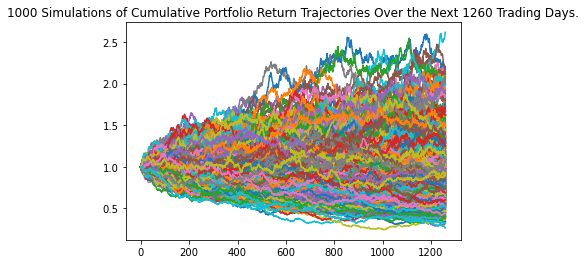

In [11]:
# Visualize the Monte Carlo simulation by creating an
# overlay line plot
even_weight_line_plot =  MC_even_weight.plot_simulation()


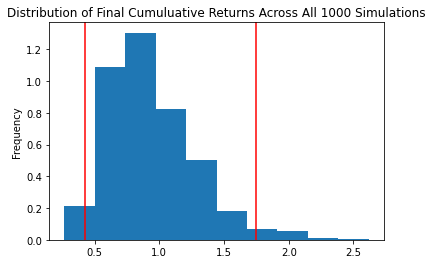

In [12]:
# Visualize the Monte Carlo simulation by creating a histogram
even_weight_distribution_plot = MC_even_weight.plot_distribution()


In [13]:
# Generate the summary statistics for the Monte Carlo simulation
# Save the summary statistics information in a variable called even_weights_table 
even_weight_table = MC_even_weight.summarize_cumulative_return()


# Print the table of summary statistics
print(even_weight_table)


count           1000.000000
mean               0.934326
std                0.335792
min                0.265585
25%                0.696417
50%                0.870906
75%                1.118977
max                2.617600
95% CI Lower       0.426976
95% CI Upper       1.742998
Name: 1260, dtype: float64


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


## Step 8: Using a 95% confidence interval and your initial investment of 15,000, determine the lower and upper bounds of the expected cumulative-return value of your portfolio after five years of growth.

In [14]:
# Using the lower and upper `95%` confidence interval values 
# (index positions 8 & 9 from the even_weight_table)
# calculate  the range of the possible outcomes for a $15,000 investment 
even_ci_lower = round(even_weight_table[8] * 15000,2)
even_ci_upper = round(even_weight_table[9] * 15000,2) 

# Print results of your calculations
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" with an even weight portfolio over the next 5 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}.")
      

There is a 95% chance that an initial investment of $15,000 in the portfolio with an even weight portfolio over the next 5 years will end within in the range of $6404.64 and $26144.97.


## Step 9: Create a second instance of MCSimulation with the same parameters, but set the `weights` parameter to `[.20,.60,.20]` to represent a portfolio with a majority of AT&T stock.

In [15]:
# Configure a Monte Carlo simulation to forecast five years cumulative returns 
# Use a weight of .60 for AT&T and .20 for the remaining 2 stocks
MC_att = MCSimulation(
    portfolio_data = prices_df,
    weights = [.20,.60,.20],
    num_simulation = 1000,
    num_trading_days = 252*5)

# Printing the first five rows of the simulation input data
MC_att.portfolio_data.head()


NKE                                             \
                            open   high    low  close    volume trade_count   
timestamp                                                                     
2017-05-01 04:00:00+00:00  55.40  55.45  54.98  54.99   4881442       30491   
2017-05-02 04:00:00+00:00  55.16  55.16  54.79  55.07   7363885       41589   
2017-05-03 04:00:00+00:00  55.17  55.30  54.40  54.53   9486619       48477   
2017-05-04 04:00:00+00:00  54.69  54.83  54.20  54.47   6830628       39260   
2017-05-05 04:00:00+00:00  54.49  54.50  53.56  53.95  13379949       57959   

                                                       T         ...  \
                                vwap daily_return   open   high  ...   
timestamp                                                        ...   
2017-05-01 04:00:00+00:00  55.201737          NaN  39.69  39.70  ...   
2017-05-02 04:00:00+00:00  54.967165     0.001455  39.15  39.22  ...   
2017-05-03 04:00:00+00:00  54.622933    -0.009806  38.94  38.98  ...   
2017-05-04 04:00:00+00:00  54.501544    -0.001100  38.38  38.41  ...   
2017-05-05 04:00:00+00:00  53.889567    -0.009547  38.06  38.71  ...   

                                                     XOM                  \
                                vwap daily_return   open     high    low   
timestamp                                                                  
2017-05-01 04:00:00+00:00  39.278779          NaN  81.56  82.2100  81.48   
2017-05-02 04:00:00+00:00  38.996448    -0.003836  82.17  82.5900  81.90   
2017-05-03 04:00:00+00:00  38.423685    -0.014121  81.97  83.0699  81.91   
2017-05-04 04:00:00+00:00  37.965109    -0.010156  82.28  82.3600  81.40   
2017-05-05 04:00:00+00:00  38.424403     0.014470  81.63  82.2350  81.61   

                                                                                
                           close    volume trade_count       vwap daily_return  
timestamp                                                                       
2017-05-01 04:00:00+00:00  82.06   8664579       49226  81.941004          NaN  
2017-05-02 04:00:00+00:00  82.05   9102893       54234  82.197909    -0.000122  
2017-05-03 04:00:00+00:00  82.70  10289447       57309  82.625679     0.007922  
2017-05-04 04:00:00+00:00  81.64  16165093       86289  81.729800    -0.012817  
2017-05-05 04:00:00+00:00  82.02  10212004       59397  81.932657     0.004655  

[5 rows x 24 columns]

## Step 10: Run the Monte Carlo simulation with the new weights. Then use MCSimulation functions to do the following:

* Visualize the simulation results by using both an overlay line plot and a histogram.
* Generate the summary statistics for this new simulation.
* Using a 95% confidence interval and your initial investment of 15,000, determine the lower and upper bounds of the expected cumulative-return value of your portfolio after five years of growth.


In [16]:
# Run a Monte Carlo simulation to forecast five years cumulative returns 
# with 60% AT&T (ticker: T) stock
MC_att.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 110.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 120.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 130.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 140.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 150.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 160.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 170.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 180.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 190.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 200.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 210.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 220.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 230.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 240.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 250.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 260.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 270.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 280.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 290.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 300.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 310.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 320.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 330.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 340.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 350.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 360.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 370.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 380.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 390.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 400.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 410.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 420.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 430.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 440.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 450.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 460.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 470.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 480.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 490.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 500.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 510.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 520.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 530.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 540.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 550.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 560.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 570.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 580.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 590.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 600.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 610.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 620.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 630.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 640.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 650.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 660.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 670.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 680.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 690.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 700.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 710.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 720.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 730.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 740.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 750.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 760.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 770.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 780.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 790.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 800.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 810.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 820.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 830.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 840.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 850.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 860.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 870.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 880.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 890.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 900.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 910.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 920.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 930.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 940.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 950.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 960.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 970.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 980.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 990.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.010868,1.006210,1.009891,1.011436,1.006514,1.005350,0.995578,0.998055,0.997629,1.019791,...,1.011746,0.998752,0.994283,0.980465,0.994741,0.971789,0.976585,1.004188,0.990710,1.012267
2,1.008676,1.016433,1.004927,1.006788,1.012278,1.017420,0.994473,0.985563,0.993987,1.034105,...,1.024433,1.008656,0.981661,0.983075,0.979421,0.967379,0.998888,1.019287,0.997822,1.006870
3,1.018423,1.024219,0.995575,1.025152,1.001881,1.039809,1.003192,0.959978,0.986099,1.012448,...,1.019544,1.001376,0.984209,0.969243,0.962772,0.960657,0.996637,1.000578,1.007903,1.014268
4,1.019130,1.022023,1.010629,1.006964,0.988794,1.041154,1.006441,0.953922,0.993674,1.037568,...,1.019146,1.015976,0.981246,0.984057,0.992315,0.978933,1.004228,0.997398,0.992189,1.003272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.905740,0.388895,0.439793,0.418884,1.434194,1.239017,0.732605,0.574873,0.907729,0.875801,...,0.355293,0.680841,1.074344,0.527321,0.991656,0.799635,0.635899,0.317040,1.089684,0.732790
1257,0.901083,0.387091,0.438908,0.419457,1.443268,1.234645,0.732700,0.579681,0.905359,0.882590,...,0.358597,0.695279,1.092806,0.533514,0.965644,0.779401,0.635460,0.316534,1.094376,0.729834
1258,0.873578,0.393670,0.438624,0.419342,1.438442,1.252242,0.726806,0.574826,0.907415,0.885588,...,0.359700,0.695606,1.110259,0.543048,0.975470,0.788169,0.637874,0.315831,1.118951,0.736453
1259,0.870645,0.387905,0.440623,0.422994,1.438713,1.268464,0.731100,0.564010,0.927655,0.899045,...,0.363987,0.696871,1.100130,0.539587,0.983623,0.796798,0.643350,0.318116,1.115888,0.736034


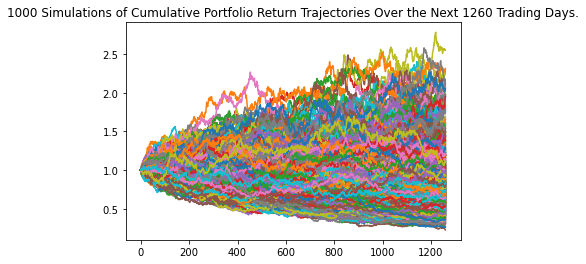

In [17]:
# Visualize the Monte Carlo simulation for a majority weight in AT&T
# by creating an overlay line plot
att_line_plot = MC_att.plot_simulation()



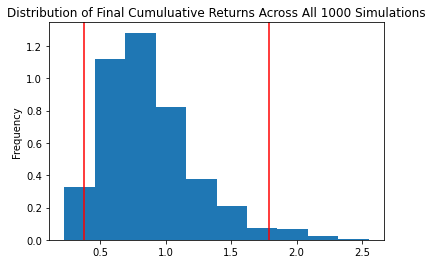

In [18]:
# Visualize the Monte Carlo simulation for a majority weight in AT&T
# by creating a histogram
att_dist_plot = MC_att.plot_distribution()



In [19]:
# Generate the summary statistics for the Monte Carlo simulation with
# majority weight in AT&T
# Save the summary statistics information in a variable called att_table 
att_table = MC_att.summarize_cumulative_return()

# Print summary statistics
print(att_table)


count           1000.000000
mean               0.869957
std                0.350675
min                0.226934
25%                0.621180
50%                0.811346
75%                1.035426
max                2.550828
95% CI Lower       0.377973
95% CI Upper       1.788944
Name: 1260, dtype: float64


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [20]:
# Using the lower and upper `95%` confidence interval values 
# (index positions 8 & 9 from the att_table)
# calculate  the range of the possible outcomes for a $15,000 investment 
att_ci_lower = round(att_table[8]*15000,2)
att_ci_upper = round(att_table[9]*15000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" with a 60% weight in AT&T over the next 5 years will end within in the range of"
      f" ${att_ci_lower} and ${att_ci_upper}.")
      

There is a 95% chance that an initial investment of $15,000 in the portfolio with a 60% weight in AT&T over the next 5 years will end within in the range of $5669.59 and $26834.16.


## Step 11: Create a third instance of MCSimulation with the same parameters, but set the `weights` variable to `[.60,.20,.20]` to represent a portfolio with a majority of Nike stock.

In [21]:
# Configure a Monte Carlo simulation to forecast five years cumulative returns
# Use a weight of .60 for Nike and .20 for the remaining 2 stocks
MC_nike = MCSimulation(
    portfolio_data = prices_df,
    weights = [.60,.20,.20],
    num_simulation = 1000,
    num_trading_days = 252*5
)

# Printing the first five rows of the simulation input data
MC_nike.portfolio_data.head()


NKE                                             \
                            open   high    low  close    volume trade_count   
timestamp                                                                     
2017-05-01 04:00:00+00:00  55.40  55.45  54.98  54.99   4881442       30491   
2017-05-02 04:00:00+00:00  55.16  55.16  54.79  55.07   7363885       41589   
2017-05-03 04:00:00+00:00  55.17  55.30  54.40  54.53   9486619       48477   
2017-05-04 04:00:00+00:00  54.69  54.83  54.20  54.47   6830628       39260   
2017-05-05 04:00:00+00:00  54.49  54.50  53.56  53.95  13379949       57959   

                                                       T         ...  \
                                vwap daily_return   open   high  ...   
timestamp                                                        ...   
2017-05-01 04:00:00+00:00  55.201737          NaN  39.69  39.70  ...   
2017-05-02 04:00:00+00:00  54.967165     0.001455  39.15  39.22  ...   
2017-05-03 04:00:00+00:00  54.622933    -0.009806  38.94  38.98  ...   
2017-05-04 04:00:00+00:00  54.501544    -0.001100  38.38  38.41  ...   
2017-05-05 04:00:00+00:00  53.889567    -0.009547  38.06  38.71  ...   

                                                     XOM                  \
                                vwap daily_return   open     high    low   
timestamp                                                                  
2017-05-01 04:00:00+00:00  39.278779          NaN  81.56  82.2100  81.48   
2017-05-02 04:00:00+00:00  38.996448    -0.003836  82.17  82.5900  81.90   
2017-05-03 04:00:00+00:00  38.423685    -0.014121  81.97  83.0699  81.91   
2017-05-04 04:00:00+00:00  37.965109    -0.010156  82.28  82.3600  81.40   
2017-05-05 04:00:00+00:00  38.424403     0.014470  81.63  82.2350  81.61   

                                                                                
                           close    volume trade_count       vwap daily_return  
timestamp                                                                       
2017-05-01 04:00:00+00:00  82.06   8664579       49226  81.941004          NaN  
2017-05-02 04:00:00+00:00  82.05   9102893       54234  82.197909    -0.000122  
2017-05-03 04:00:00+00:00  82.70  10289447       57309  82.625679     0.007922  
2017-05-04 04:00:00+00:00  81.64  16165093       86289  81.729800    -0.012817  
2017-05-05 04:00:00+00:00  82.02  10212004       59397  81.932657     0.004655  

[5 rows x 24 columns]

## Step 12: Run the Monte Carlo simulation with the new weights. Then use MCSimulation functions to do the following:

*Visualize the simulation results by using both an overlay line plot and a histogram.
* Generate the summary statistics for this new simulation.
* Using a 95% confidence interval and your initial investment of 15,000, determine the lower and upper bounds of the expected cumulative-return value of your portfolio after five years of growth.

In [22]:
# Run a Monte Carlo simulation to forecast five years cumulative returns 
# with 60% Nike (ticker: NKE) stock
MC_nike.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 110.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 120.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 130.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 140.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 150.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 160.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 170.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 180.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 190.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 200.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 210.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 220.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 230.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 240.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 250.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 260.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 270.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 280.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 290.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 300.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 310.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 320.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 330.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 340.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 350.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 360.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 370.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 380.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 390.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 400.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 410.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 420.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 430.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 440.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 450.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 460.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 470.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 480.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 490.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 500.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 510.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 520.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 530.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 540.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 550.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 560.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 570.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 580.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 590.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 600.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 610.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 620.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 630.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 640.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 650.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 660.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 670.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 680.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 690.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 700.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 710.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 720.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 730.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 740.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 750.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 760.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 770.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 780.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 790.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 800.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 810.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 820.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 830.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 840.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 850.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 860.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 870.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 880.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 890.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 900.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 910.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 920.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 930.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 940.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 950.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 960.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 970.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 980.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 990.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.988517,0.984622,1.005608,1.009963,0.976092,1.000011,1.021185,1.003425,1.008934,0.996279,...,1.001201,0.996896,0.996744,0.984648,1.008420,0.988837,1.020462,0.992416,1.021092,1.009507
2,0.985947,0.968298,1.006056,1.026812,0.967288,1.019821,1.018573,1.029441,1.005993,1.011332,...,0.997325,1.010843,0.988835,0.982455,1.010885,0.992876,1.019015,1.008752,1.015420,1.027181
3,0.972493,0.952844,1.005561,0.997985,0.985739,1.014933,1.034376,1.034778,0.982399,1.025350,...,0.999569,1.005127,0.964455,0.990972,1.043974,0.997719,0.990324,1.006336,1.007384,1.029491
4,0.968891,0.941115,0.997093,1.008971,0.990528,1.029399,1.034169,1.040335,1.004744,1.025468,...,1.002182,1.017906,0.979167,0.991237,1.056452,1.004785,0.993929,1.015946,1.023366,1.012319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.763296,0.791588,2.430337,0.724442,0.965574,0.785448,1.746787,1.149285,1.330622,1.539618,...,0.891744,0.548703,1.231029,1.259581,1.421463,0.912267,2.667614,1.708202,0.852759,1.158203
1257,1.837128,0.776518,2.363908,0.718610,0.958287,0.781206,1.739382,1.150922,1.362719,1.522502,...,0.919115,0.551251,1.229031,1.251245,1.442978,0.904254,2.651186,1.747863,0.852251,1.155432
1258,1.834135,0.788817,2.413959,0.727516,0.947445,0.769432,1.763242,1.158439,1.381591,1.516551,...,0.925747,0.549679,1.233579,1.300132,1.472916,0.904779,2.650056,1.740339,0.842149,1.134478
1259,1.830265,0.786289,2.410322,0.722307,0.927349,0.782123,1.751318,1.178206,1.392400,1.510949,...,0.924496,0.546001,1.222699,1.305996,1.460106,0.921712,2.630384,1.745869,0.847111,1.137435


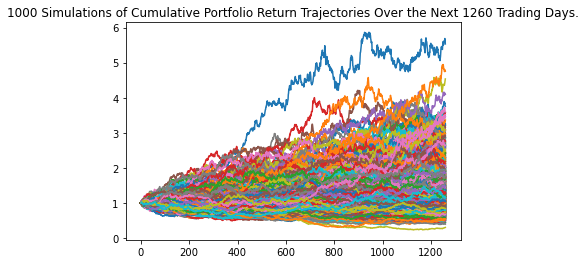

In [23]:
# Visualize the Monte Carlo simulation for a majority weight in Nike
# by creating an overlay line plot
nike_line_plot = MC_nike.plot_simulation()


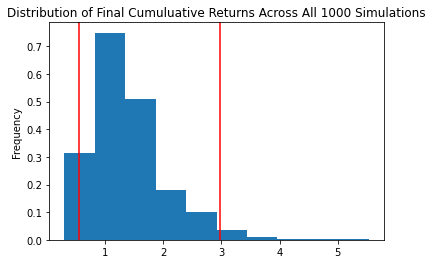

In [24]:
# Visualize the Monte Carlo simulation for a majority weight in Nike
# by creating a histogram
nike_dist_plot = MC_nike.plot_distribution()


In [25]:
# Generate the summary statistics for the Monte Carlo simulation with
# majority weight in Nike
# Save the summary statistics information in a variable called nike_table 
nike_table = MC_nike.summarize_cumulative_return()

# Print summary statistics
print(nike_table)


count           1000.000000
mean               1.390715
std                0.639605
min                0.302578
25%                0.943259
50%                1.259947
75%                1.699003
max                5.532586
95% CI Lower       0.557042
95% CI Upper       2.984310
Name: 1260, dtype: float64


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [26]:
# Using the lower and upper `95%` confidence interval values 
# (index positions 8 & 9 from the nike_table),
# calculate  the range of the possible outcomes for a $15,000 investment 
nike_ci_lower = round(nike_table[8]*15000,2)
nike_ci_upper = round(nike_table[9]*15000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" with a 60% weight in Nike over the next 5 years will end within in the range of"
      f" ${nike_ci_lower} and ${nike_ci_upper}.")

      

There is a 95% chance that an initial investment of $15,000 in the portfolio with a 60% weight in Nike over the next 5 years will end within in the range of $8355.63 and $44764.65.


## Step 13: Create a fourth instance of MCSimulation with the same parameters, but set the `weights` variable to `[.20,.20,.60]` to represent a portfolio with a majority of Exxon stock.

In [27]:
# Configuring a Monte Carlo simulation to forecast five years cumulative returns
# Use a weight of .60 for XOM and .20 for the remaining 2 stocks
MC_exxon = MCSimulation(
    portfolio_data = prices_df,
    weights = [.20,.20,.60],
    num_simulation = 1000,
    num_trading_days = 252*5)

# Printing the first five rows of the simulation input data
MC_exxon.portfolio_data.head()


NKE                                             \
                            open   high    low  close    volume trade_count   
timestamp                                                                     
2017-05-01 04:00:00+00:00  55.40  55.45  54.98  54.99   4881442       30491   
2017-05-02 04:00:00+00:00  55.16  55.16  54.79  55.07   7363885       41589   
2017-05-03 04:00:00+00:00  55.17  55.30  54.40  54.53   9486619       48477   
2017-05-04 04:00:00+00:00  54.69  54.83  54.20  54.47   6830628       39260   
2017-05-05 04:00:00+00:00  54.49  54.50  53.56  53.95  13379949       57959   

                                                       T         ...  \
                                vwap daily_return   open   high  ...   
timestamp                                                        ...   
2017-05-01 04:00:00+00:00  55.201737          NaN  39.69  39.70  ...   
2017-05-02 04:00:00+00:00  54.967165     0.001455  39.15  39.22  ...   
2017-05-03 04:00:00+00:00  54.622933    -0.009806  38.94  38.98  ...   
2017-05-04 04:00:00+00:00  54.501544    -0.001100  38.38  38.41  ...   
2017-05-05 04:00:00+00:00  53.889567    -0.009547  38.06  38.71  ...   

                                                     XOM                  \
                                vwap daily_return   open     high    low   
timestamp                                                                  
2017-05-01 04:00:00+00:00  39.278779          NaN  81.56  82.2100  81.48   
2017-05-02 04:00:00+00:00  38.996448    -0.003836  82.17  82.5900  81.90   
2017-05-03 04:00:00+00:00  38.423685    -0.014121  81.97  83.0699  81.91   
2017-05-04 04:00:00+00:00  37.965109    -0.010156  82.28  82.3600  81.40   
2017-05-05 04:00:00+00:00  38.424403     0.014470  81.63  82.2350  81.61   

                                                                                
                           close    volume trade_count       vwap daily_return  
timestamp                                                                       
2017-05-01 04:00:00+00:00  82.06   8664579       49226  81.941004          NaN  
2017-05-02 04:00:00+00:00  82.05   9102893       54234  82.197909    -0.000122  
2017-05-03 04:00:00+00:00  82.70  10289447       57309  82.625679     0.007922  
2017-05-04 04:00:00+00:00  81.64  16165093       86289  81.729800    -0.012817  
2017-05-05 04:00:00+00:00  82.02  10212004       59397  81.932657     0.004655  

[5 rows x 24 columns]

## Step 14: Run the Monte Carlo simulation with the new weights. Then use MCSimulation functions to do the following:

* Visualize the simulation results by using both an overlay line plot and a histogram.
* Generate the summary statistics for this new simulation.
* Using a 95% confidence interval and your initial investment of 15,000, determine the lower and upper bounds of the expected cumulative-return value of your portfolio after five years of growth.

In [28]:
# Run a Monte Carlo simulation to forecast five years cumulative returns 
# with 60% Exxon (ticker: XOM) stock
MC_exxon.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 110.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 120.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 130.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 140.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 150.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 160.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 170.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 180.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 190.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 200.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 210.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 220.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 230.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 240.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 250.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 260.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 270.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 280.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 290.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 300.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 310.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 320.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 330.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 340.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 350.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 360.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 370.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 380.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 390.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 400.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 410.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 420.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 430.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 440.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 450.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 460.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 470.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 480.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 490.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 500.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 510.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 520.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 530.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 540.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 550.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 560.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 570.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 580.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 590.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 600.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 610.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 620.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 630.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 640.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 650.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 660.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 670.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 680.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 690.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 700.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 710.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 720.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 730.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 740.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 750.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 760.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 770.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 780.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 790.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 800.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 810.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 820.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 830.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 840.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 850.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 860.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 870.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 880.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 890.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 900.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 910.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 920.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 930.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 940.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 950.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 960.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 970.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 980.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

Running Monte Carlo simulation number 990.


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/michaeldionne/Documents/GitHub/Fintech-Workspac

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995869,1.010507,0.985586,0.997779,0.994885,1.014258,1.003292,0.996877,0.992854,0.987499,...,1.014784,1.016431,0.994535,0.997433,0.993284,0.996770,0.988193,0.987219,1.009389,1.003933
2,0.995059,1.005150,0.992644,0.982094,0.999059,1.012651,1.021512,0.998138,0.978275,0.996758,...,1.026196,1.009305,0.996881,0.987703,0.979428,1.003397,0.969174,0.996283,1.006947,0.985088
3,0.987612,0.997622,0.992688,0.982538,1.007571,1.008330,1.034188,0.995518,0.970421,1.007807,...,1.025195,1.005834,0.993944,0.995192,0.979650,0.977788,0.977551,0.986096,1.030279,0.973418
4,0.993647,0.998640,0.997218,0.956098,0.997298,1.005669,1.033118,0.994764,0.971849,1.005273,...,1.030246,0.995221,0.990357,1.008339,0.981363,0.995520,0.993658,0.988766,1.021838,0.975209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.726529,1.313660,0.476359,1.019494,0.508361,0.721421,0.573199,0.274549,0.625099,0.615290,...,0.753154,0.443526,0.609818,0.760376,0.950775,0.306044,0.607751,0.259949,0.782398,1.236082
1257,0.734146,1.306694,0.475594,1.002134,0.508645,0.718074,0.561487,0.273003,0.613842,0.618916,...,0.763536,0.445421,0.613230,0.748623,0.951346,0.307959,0.611549,0.255910,0.777118,1.225635
1258,0.741118,1.285780,0.482675,1.016517,0.518316,0.733543,0.562730,0.270361,0.619155,0.618168,...,0.762388,0.436038,0.610592,0.746506,0.937693,0.309683,0.611047,0.255115,0.771473,1.194774
1259,0.741218,1.306900,0.488553,1.004800,0.517531,0.734846,0.566133,0.271394,0.618677,0.628429,...,0.766757,0.433893,0.595835,0.738011,0.922339,0.309148,0.611503,0.257352,0.772463,1.180216


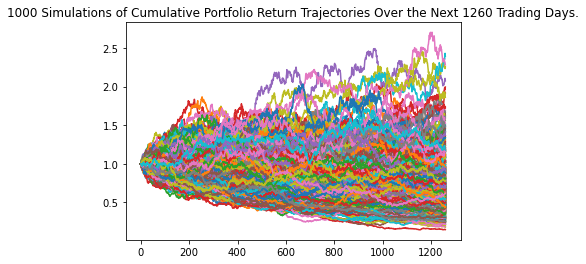

In [29]:
# Visualize the Monte Carlo simulation for a majority weight in Exxon
# by creating an overlay line plot
exxon_line_plot = MC_exxon.plot_simulation()


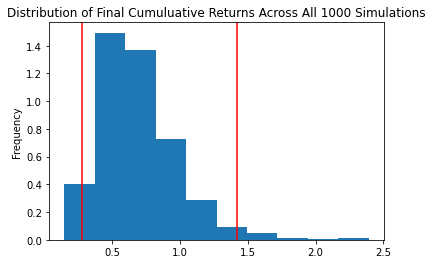

In [30]:
# Visualize the Monte Carlo simulation for a majority weight in Exxon
# by creating a histogram
exxon_dist_plot = MC_exxon.plot_distribution()


In [31]:
# Generate the summary statistics for the Monte Carlo simulation with
# majority weight in Exxon
# Save the summary statistics information in a variable called nexxontable 
exxon_table = MC_exxon.summarize_cumulative_return()

# Print summary statistics
print(exxon_table)

count           1000.000000
mean               0.698060
std                0.294527
min                0.148929
25%                0.501159
50%                0.645641
75%                0.845764
max                2.391742
95% CI Lower       0.276889
95% CI Upper       1.422094
Name: 1260, dtype: float64


/Users/michaeldionne/Documents/GitHub/Fintech-Workspace/Module 5/Reading/01-Three_Stock_Monte/Unsolved/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [32]:
# Using the lower and upper `95%` confidence interval values 
# (index positions 8 & 9 from the exxon_table),
# calculate  the range of the possible outcomes for a $15,000 investment 
exxon_ci_lower = round(exxon_table[8]*15000,2)
exxon_ci_upper = round(exxon_table[9]*15000,2)

# Print results
# Print results
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" with a 60% weight in Exxon over the next 5 years will end within in the range of"
      f" ${exxon_ci_lower} and ${exxon_ci_upper}.")
      

There is a 95% chance that an initial investment of $15,000 in the portfolio with a 60% weight in Exxon over the next 5 years will end within in the range of $4153.34 and $21331.41.


## Step 15: Review all four simulated portfolios, and determine which set of investments gives you the best chance of a profit. In your notebook, write which portfolio you choose, and why.

In [33]:
# Even weighted stocks
print("Even weighted stocks")
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" with an even weight over the next 5 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}.")
print("------------")

# 60% for AT&T
print("60% for AT&T")
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" with a 60% weight in AT&T over the next 5 years will end within in the range of"
      f" ${att_ci_lower} and ${att_ci_upper}.")
print("------------")

# 60% for Nike
print("60% for Nike")
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" with a 60% weight in Nike over the next 5 years will end within in the range of"
      f" ${nike_ci_lower} and ${nike_ci_upper}.")
print("------------")

# 60% for Exxon
print("60% for Exxon")
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" with a 60% weight in Exxon over the next 5 years will end within in the range of"
      f" ${exxon_ci_lower} and ${exxon_ci_upper}.")
print("------------")


Even weighted stocks
There is a 95% chance that an initial investment of $15,000 in the portfolio with an even weight over the next 5 years will end within in the range of $6404.64 and $26144.97.
------------
60% for AT&T
There is a 95% chance that an initial investment of $15,000 in the portfolio with a 60% weight in AT&T over the next 5 years will end within in the range of $5669.59 and $26834.16.
------------
60% for Nike
There is a 95% chance that an initial investment of $15,000 in the portfolio with a 60% weight in Nike over the next 5 years will end within in the range of $8355.63 and $44764.65.
------------
60% for Exxon
There is a 95% chance that an initial investment of $15,000 in the portfolio with a 60% weight in Exxon over the next 5 years will end within in the range of $4153.34 and $21331.41.
------------


**Question:** Based on the above information, which set of investments gives you the best chance of a profit?

**Answer:** # YOUR ANSWER HERE